In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split


In [11]:
os.makedirs('../data',exist_ok=True)

transform = transforms.Compose([transforms.ToTensor()])

mnist_train = datasets.MNIST(root="../data", train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root="../data", train=False, download=True, transform=transform)

train_images = np.stack([np.array(img[0]) for img in mnist_train])
test_images = np.stack([np.array(img[0]) for img in mnist_test])

train_images, val_images = train_test_split(train_images, test_size=0.2, random_state=42)

np.save("../data/mnist_train.npy", train_images)
np.save("../data/mnist_val.npy", val_images)
np.save("../data/mnist_test.npy", test_images)

In [23]:
val_images = np.load('../data/mnist_val.npy')
print(f"val_image shape: {val_images.shape}")
print(f"val_image min & max: {val_images.min()}, {val_images.max()}")


val_image shape: (12000, 1, 28, 28)
val_image min & max: 0.0, 1.0


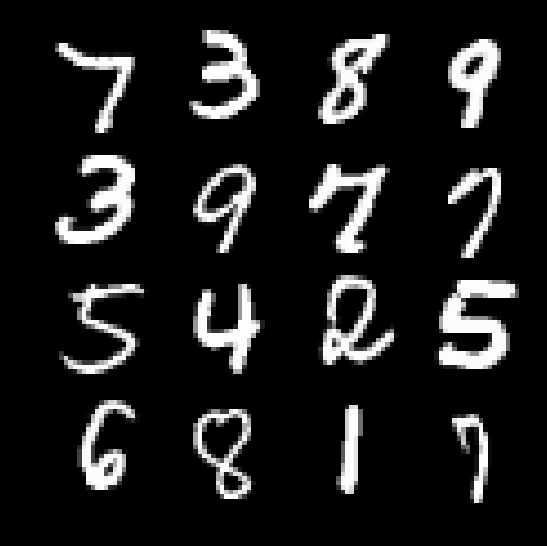

In [18]:
fig = plt.figure(figsize=(5,5))
fig.patch.set_facecolor('black')
for i in range(16):
    _val_image = val_images[i,0,:,:]
    plt.subplot(4,4,i+1)
    plt.imshow(_val_image,cmap='gray',vmax=1,vmin=0)

plt.tight_layout()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
plt.show()
    